# Proyecto 3
## Tópicos especiales en Telemática
## Big Data - Covid 19

In [1]:
#import SparkSession
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType,DoubleType,IntegerType
from pyspark.sql.functions import datediff, to_date, lit, unix_timestamp

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
5,application_1589718614500_0006,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
#create spar session object
spark=SparkSession.builder.appName('data_processing').getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Carga de datos desde el datalake

In [3]:
#Colombia
df_col=spark.read.csv('s3://jaromanp/covid19data/Casos_positivos_de_COVID-19_en_Colombia.csv',inferSchema=True,header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
#Global
df_glo=spark.read.csv('s3://jaromanp/covid19data/WHO-COVID-19-global-data.csv',inferSchema=True,header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
#Numero de pruebas a nivel mundial por país
df_test=spark.read.csv('s3://jaromanp/covid19data/covid-19-tests-country.csv',inferSchema=True,header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Análisis exploratorio

## Información general de los datasets

### 1. Columnas

In [6]:
### Colombia
df_col.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['ID de caso', 'Fecha de notificación', 'Codigo DIVIPOLA', 'Ciudad de ubicación', 'Departamento o Distrito ', 'atención', 'Edad', 'Sexo', 'Tipo', 'Estado', 'País de procedencia', 'FIS', 'Fecha de muerte', 'Fecha diagnostico', 'Fecha recuperado', 'fecha reporte web']

In [7]:
#Columnas global
df_glo.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['day', 'Country', 'Country Name', 'Region', 'Deaths', 'Cumulative Deaths', 'Confirmed', 'Cumulative Confirmed']

In [8]:
df_test.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['Entity', 'Code', 'Year', 'Total COVID-19 tests']

### 2. Cantidad de columnas

In [9]:
#Colombia
len(df_col.columns)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

16

In [10]:
#Global
len(df_glo.columns)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

8

In [11]:
#Test
len(df_glo.columns)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

8

### 3. Número de registros 

In [12]:
#Colombia 
df_col.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

14939

In [13]:
#Global
df_glo.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

15462

In [14]:
#Test
df_test.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

77

### 4. Esquema general de los datos

In [15]:
#Colombia
df_col.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- ID de caso: integer (nullable = true)
 |-- Fecha de notificación: timestamp (nullable = true)
 |-- Codigo DIVIPOLA: integer (nullable = true)
 |-- Ciudad de ubicación: string (nullable = true)
 |-- Departamento o Distrito : string (nullable = true)
 |-- atención: string (nullable = true)
 |-- Edad: integer (nullable = true)
 |-- Sexo: string (nullable = true)
 |-- Tipo: string (nullable = true)
 |-- Estado: string (nullable = true)
 |-- País de procedencia: string (nullable = true)
 |-- FIS: string (nullable = true)
 |-- Fecha de muerte: string (nullable = true)
 |-- Fecha diagnostico: timestamp (nullable = true)
 |-- Fecha recuperado: string (nullable = true)
 |-- fecha reporte web: timestamp (nullable = true)

In [16]:
#Global
df_glo.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- day: timestamp (nullable = true)
 |-- Country: string (nullable = true)
 |-- Country Name: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Deaths: integer (nullable = true)
 |-- Cumulative Deaths: integer (nullable = true)
 |-- Confirmed: integer (nullable = true)
 |-- Cumulative Confirmed: integer (nullable = true)

In [17]:
#Test
df_test.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- Entity: string (nullable = true)
 |-- Code: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Total COVID-19 tests: integer (nullable = true)

### 5. Información de los dataset

In [18]:
#Colombia
df_col.describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------------+------------------+-------------------+------------------------+----------+-----------------+-----+-----------+------------+-------------------+--------------------+--------------------+--------------------+
|summary|       ID de caso|   Codigo DIVIPOLA|Ciudad de ubicación|Departamento o Distrito |  atención|             Edad| Sexo|       Tipo|      Estado|País de procedencia|                 FIS|     Fecha de muerte|    Fecha recuperado|
+-------+-----------------+------------------+-------------------+------------------------+----------+-----------------+-----+-----------+------------+-------------------+--------------------+--------------------+--------------------+
|  count|            14939|             14939|              14939|                   14939|     14939|            14939|14939|      14939|       14924|              14938|               14939|               14924|               14939|
|   mean|7498.275989022023| 31850.04839681371|              

In [19]:
#Global
df_glo.describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-------+--------------------+------+------------------+------------------+-----------------+--------------------+
|summary|Country|        Country Name|Region|            Deaths| Cumulative Deaths|        Confirmed|Cumulative Confirmed|
+-------+-------+--------------------+------+------------------+------------------+-----------------+--------------------+
|  count|  15360|               15462| 15360|             15462|             15462|            15462|               15462|
|   mean|   null|                null|  null| 19.54268529297633| 547.0756047083172|  286.80979174751|    8385.80028456862|
| stddev|   null|                null|  null|139.11314437519567|3621.0383460929384|1738.877849583212|    53575.6254128046|
|    min|     AD|         Afghanistan|  AFRO|             -1696|                 0|            -2461|                   1|
|    max|     ZW|occupied Palestin...|  WPRO|              5475|             83819|            38509|             1382362|
+-------+-------

In [20]:
#Test
df_test.describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-------+----+------------------+--------------------+
|summary| Entity|Code|              Year|Total COVID-19 tests|
+-------+-------+----+------------------+--------------------+
|  count|     77|  59|                77|                  77|
|   mean|   null|null|56.506493506493506|   30387.96103896104|
| stddev|   null|null| 4.229045483393998|   61674.89557827047|
|    min|Armenia| ARE|                34|                 222|
|    max|Vietnam| ZAF|                59|              320000|
+-------+-------+----+------------------+--------------------+

### 6. Selección de información

In [21]:
# Colombia
df_col.select('Ciudad de ubicación','Sexo', 'Edad', 'País de procedencia').show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+----+----+--------------------+
|Ciudad de ubicación|Sexo|Edad| País de procedencia|
+-------------------+----+----+--------------------+
|        Bogotá D.C.|   F|  19|              Italia|
|Guadalajara de Buga|   M|  34|              España|
|           Medellín|   F|  50|              España|
|           Medellín|   M|  55|            Colombia|
|           Medellín|   M|  25|            Colombia|
|             Itagüí|   F|  27|            Colombia|
|Cartagena de Indias|   F|  85|Estados Unidos de...|
|        Bogotá D.C.|   F|  22|              España|
|        Bogotá D.C.|   F|  28|              España|
|        Bogotá D.C.|   F|  36|              España|
|        Bogotá D.C.|   F|  42|              España|
|              Neiva|   F|  74|              Italia|
|              Neiva|   F|  68|            Colombia|
|            Palmira|   M|  48|              España|
|      Villavicencio|   F|  30|              España|
|        Bogotá D.C.|   F|  61|              I

In [22]:
# Global
df_glo.select('day','Country Name', 'Cumulative Deaths', 'Cumulative Confirmed').show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+------------+-----------------+--------------------+
|                day|Country Name|Cumulative Deaths|Cumulative Confirmed|
+-------------------+------------+-----------------+--------------------+
|2020-02-24 00:00:00| Afghanistan|                0|                   1|
|2020-02-25 00:00:00| Afghanistan|                0|                   1|
|2020-02-26 00:00:00| Afghanistan|                0|                   1|
|2020-02-27 00:00:00| Afghanistan|                0|                   1|
|2020-02-28 00:00:00| Afghanistan|                0|                   1|
|2020-02-29 00:00:00| Afghanistan|                0|                   1|
|2020-03-01 00:00:00| Afghanistan|                0|                   1|
|2020-03-02 00:00:00| Afghanistan|                0|                   1|
|2020-03-03 00:00:00| Afghanistan|                0|                   1|
|2020-03-04 00:00:00| Afghanistan|                0|                   1|
|2020-03-05 00:00:00| Afghanistan|    

In [23]:
# Global
df_test.select('Entity', 'Total COVID-19 tests').show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|              Entity|Total COVID-19 tests|
+--------------------+--------------------+
|             Armenia|                 813|
|           Australia|              113615|
|Australia - Austr...|                2062|
|Australia - New S...|               39089|
|Australia - Queen...|               27000|
|Australia - South...|               16717|
|Australia - Tasmania|                 807|
|Australia - Victoria|               19337|
|Australia - Weste...|                8603|
|             Austria|               15613|
|             Bahrain|               18645|
|             Belarus|               16000|
|             Belgium|               18360|
|              Brazil|                2927|
|    Canada - Alberta|               17013|
|Canada - British ...|                6326|
|Canada - National...|               54956|
|Canada - New Brun...|                 520|
|Canada - Northwes...|                 222|
|Canada - Nova Scotia|          

In [24]:
df_col2 = df_col.drop('País de procedencia','Codigo DIVIPOLA', 'ID de caso', 'FIS', 'Departamento o Distrito', 'fecha reporte web')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
#Columna con el dato de cuantos días han pasado desde que se descubrió el caso
df_col2.withColumn("Dias desde que se descubrio el caso", 
              datediff(to_date(lit("2020-05-17")),
                       to_date(unix_timestamp('Fecha diagnostico', "yyyy/MM/dd").cast("timestamp")))).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------+-------------------+------------------------+----------+----+----+-----------+------+---------------+-------------------+--------------------+-----------------------------------+
|Fecha de notificación|Ciudad de ubicación|Departamento o Distrito |  atención|Edad|Sexo|       Tipo|Estado|Fecha de muerte|  Fecha diagnostico|    Fecha recuperado|Dias desde que se descubrio el caso|
+---------------------+-------------------+------------------------+----------+----+----+-----------+------+---------------+-------------------+--------------------+-----------------------------------+
|  2020-03-02 00:00:00|        Bogotá D.C.|             Bogotá D.C.|Recuperado|  19|   F|  Importado|  Leve|          -   -|2020-03-06 00:00:00|2020-03-13T00:00:...|                                 72|
|  2020-03-06 00:00:00|Guadalajara de Buga|         Valle del Cauca|Recuperado|  34|   M|  Importado|  Leve|          -   -|2020-03-09 00:00:00|2020-03-19T00:00:...|                           

In [26]:
#Personas mayores de 60 (Mayor riesgo )
df_col.filter(df_col['edad'] > 60).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+---------------------+---------------+-------------------+------------------------+----------+----+----+-----------+------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+
|ID de caso|Fecha de notificación|Codigo DIVIPOLA|Ciudad de ubicación|Departamento o Distrito |  atención|Edad|Sexo|       Tipo|      Estado| País de procedencia|                 FIS|     Fecha de muerte|  Fecha diagnostico|    Fecha recuperado|  fecha reporte web|
+----------+---------------------+---------------+-------------------+------------------------+----------+----+----+-----------+------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+
|         7|  2020-03-08 00:00:00|          13001|Cartagena de Indias|     Cartagena D.T. y C.|Recuperado|  85|   F|  Importado|        Leve|Estados Unidos de...|2020-03-02T00:00:...|               -   

### Países más afectados

In [27]:
#Paises con mayor número de muertes
df_glo.filter(df_glo['day'] == "2020-05-10").groupBy('Country Name', 'Cumulative Deaths').count().orderBy('Cumulative Deaths',ascending=False).show(20,False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------+-----------------+-----+
|Country Name              |Cumulative Deaths|count|
+--------------------------+-----------------+-----+
|United States of America  |75364            |1    |
|The United Kingdom        |31587            |1    |
|Italy                     |30395            |1    |
|Spain                     |26478            |1    |
|France                    |26268            |1    |
|Brazil                    |9897             |1    |
|Belgium                   |8581             |1    |
|Germany                   |7395             |1    |
|Iran (Islamic Republic of)|6640             |1    |
|Netherlands               |5422             |1    |
|China                     |4643             |1    |
|Canada                    |4628             |1    |
|Turkey                    |3739             |1    |
|Sweden                    |3220             |1    |
|Mexico                    |3160             |1    |
|India                     |2109             |

In [28]:
#Paises con mayor número de contagios
df_glo.filter(df_glo['day'] == "2020-05-10").groupBy('Country Name', 'Cumulative Confirmed').count().orderBy('Cumulative Confirmed',ascending=False).show(20,False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------+--------------------+-----+
|Country Name              |Cumulative Confirmed|count|
+--------------------------+--------------------+-----+
|United States of America  |1245775             |1    |
|Spain                     |223578              |1    |
|Italy                     |218268              |1    |
|The United Kingdom        |215264              |1    |
|Russian Federation        |209688              |1    |
|Germany                   |169218              |1    |
|Brazil                    |145328              |1    |
|Turkey                    |137115              |1    |
|France                    |137008              |1    |
|Iran (Islamic Republic of)|107603              |1    |
|China                     |84430               |1    |
|Canada                    |66780               |1    |
|India                     |62939               |1    |
|Peru                      |61847               |1    |
|Belgium                   |52596               

In [29]:
#Paises que superaron los 50000 casos positivos al día 10 de mayo
df_glo.filter(df_glo['Cumulative Confirmed'] > 50000).filter(df_glo['day'] == "2020-05-10").show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+--------------------+------+------+-----------------+---------+--------------------+
|                day|Country|        Country Name|Region|Deaths|Cumulative Deaths|Confirmed|Cumulative Confirmed|
+-------------------+-------+--------------------+------+------+-----------------+---------+--------------------+
|2020-05-10 00:00:00|     BE|             Belgium|  EURO|    60|             8581|      585|               52596|
|2020-05-10 00:00:00|     BR|              Brazil|  AMRO|   751|             9897|    10222|              145328|
|2020-05-10 00:00:00|     CA|              Canada|  AMRO|   157|             4628|     1381|               66780|
|2020-05-10 00:00:00|     CN|               China|  WPRO|     0|             4643|       14|               84430|
|2020-05-10 00:00:00|     FR|              France|  EURO|    80|            26268|      430|              137008|
|2020-05-10 00:00:00|     DE|             Germany|  EURO|    26|             7395|      

In [30]:
#Paises que superaron las 10000 muertes al día 10 de mayo
df_glo.filter(df_glo['Cumulative Deaths'] > 10000).filter(df_glo['day'] == "2020-05-10").show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+--------------------+------+------+-----------------+---------+--------------------+
|                day|Country|        Country Name|Region|Deaths|Cumulative Deaths|Confirmed|Cumulative Confirmed|
+-------------------+-------+--------------------+------+------+-----------------+---------+--------------------+
|2020-05-10 00:00:00|     FR|              France|  EURO|    80|            26268|      430|              137008|
|2020-05-10 00:00:00|     IT|               Italy|  EURO|   194|            30395|     1083|              218268|
|2020-05-10 00:00:00|     ES|               Spain|  EURO|   227|            26478|      721|              223578|
|2020-05-10 00:00:00|     GB|  The United Kingdom|  EURO|   346|            31587|     3896|              215264|
|2020-05-10 00:00:00|     US|United States of ...|  AMRO|  5475|            75364|      -99|             1245775|
+-------------------+-------+--------------------+------+------+-----------------+------

### Ciudades más afectadas en Colombia

In [31]:
#Agrupamiento por mayor cantidad de casos en ciudades 
df_col.groupBy('Ciudad de ubicación').count().orderBy('count',ascending=False).show(20,False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|Ciudad de ubicación |count|
+--------------------+-----+
|Bogotá D.C.         |5283 |
|Cali                |1343 |
|Cartagena de Indias |1197 |
|Leticia             |1003 |
|Villavicencio       |915  |
|Barranquilla        |812  |
|Soledad             |446  |
|Medellín            |342  |
|San Andrés de Tumaco|281  |
|Santa Marta         |245  |
|Pereira             |165  |
|Ibagué              |139  |
|Neiva               |122  |
|Soacha              |118  |
|Malambo             |109  |
|Ipiales             |107  |
|Buenaventura        |95   |
|Cúcuta              |84   |
|Ciénaga             |70   |
|Pasto               |69   |
+--------------------+-----+
only showing top 20 rows

## Top 20 países con mayor cantidad de test realizados

In [32]:
df_test.groupBy('Entity', 'Total COVID-19 tests').count().orderBy('Total Covid-19 tests',ascending=False).show(20,False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------+--------------------+-----+
|Entity                            |Total COVID-19 tests|count|
+----------------------------------+--------------------+-----+
|China - Guangdong                 |320000              |1    |
|South Korea                       |316664              |1    |
|Italy                             |206886              |1    |
|Germany                           |167000              |1    |
|Russia                            |143519              |1    |
|United Arab Emirates              |125000              |1    |
|Australia                         |113615              |1    |
|United States                     |103945              |1    |
|Iran                              |80000               |1    |
|United Kingdom                    |64621               |1    |
|Canada - National lab             |54956               |1    |
|Norway                            |43735               |1    |
|Australia - New South Wales       |3908

# Visualización gráfica de los datos

In [33]:
sc.install_pypi_package("pandas")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

In [34]:
sc.install_pypi_package("matplotlib")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltd

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [36]:
col_dataframe = df_col.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
glo_dataframe = df_glo.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
test_dataframe = df_test.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Ciudades en Colombia con mayor cantidad de contagiados

In [39]:
df_col_cities = df_col.groupBy('Ciudad de ubicación').count().orderBy('count',ascending=False).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [40]:
df_col_cities_r = df_col_cities.iloc[0:25]
df_col_cities_r

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

     Ciudad de ubicación  count
0            Bogotá D.C.   5283
1                   Cali   1343
2    Cartagena de Indias   1197
3                Leticia   1003
4          Villavicencio    915
5           Barranquilla    812
6                Soledad    446
7               Medellín    342
8   San Andrés de Tumaco    281
9            Santa Marta    245
10               Pereira    165
11                Ibagué    139
12                 Neiva    122
13                Soacha    118
14               Malambo    109
15               Ipiales    107
16          Buenaventura     95
17                Cúcuta     84
18               Ciénaga     70
19          Sabanagrande     69
20                 Pasto     69
21           Puebloviejo     67
22          Dosquebradas     66
23               Palmira     55
24             La Dorada     55

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

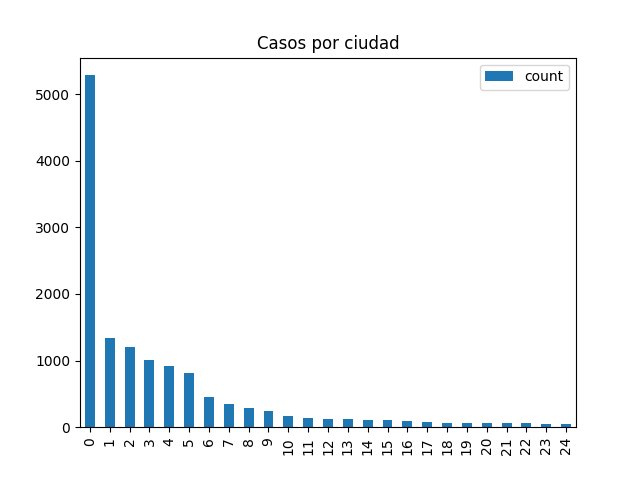

In [41]:
df_col_cities_r.plot(kind='bar', title='Casos por ciudad')
%matplot plt

### Paises con mayor cantidad de contagiados

In [42]:
df_glo_countries = df_glo.filter(df_glo['day'] == "2020-05-10").groupBy('Country Name', 'Cumulative Confirmed').count().orderBy('Cumulative Confirmed',ascending=False).toPandas()
df_glo_countries_r = df_glo_countries.iloc[0:50, 0:2]
df_glo_countries_r

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                  Country Name  Cumulative Confirmed
0     United States of America               1245775
1                        Spain                223578
2                        Italy                218268
3           The United Kingdom                215264
4           Russian Federation                209688
5                      Germany                169218
6                       Brazil                145328
7                       Turkey                137115
8                       France                137008
9   Iran (Islamic Republic of)                107603
10                       China                 84430
11                      Canada                 66780
12                       India                 62939
13                        Peru                 61847
14                     Belgium                 52596
15                 Netherlands                 42382
16                Saudi Arabia                 39048
17                      Mexico                

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

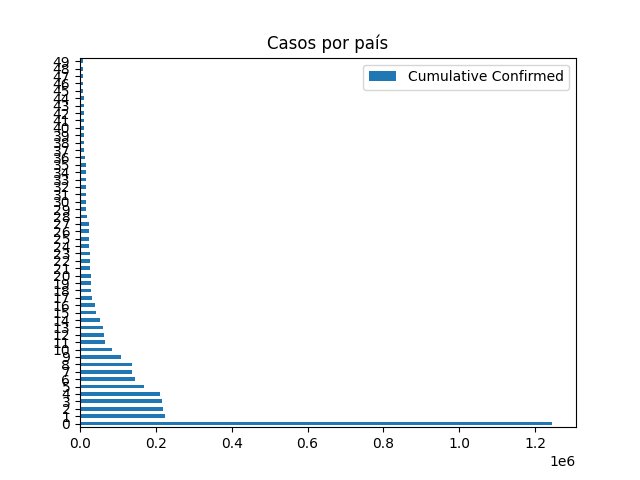

In [43]:
df_glo_countries_r.plot(kind='barh', title='Casos por país')
%matplot plt

## Distribución por sexo de infectados en Colombia

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

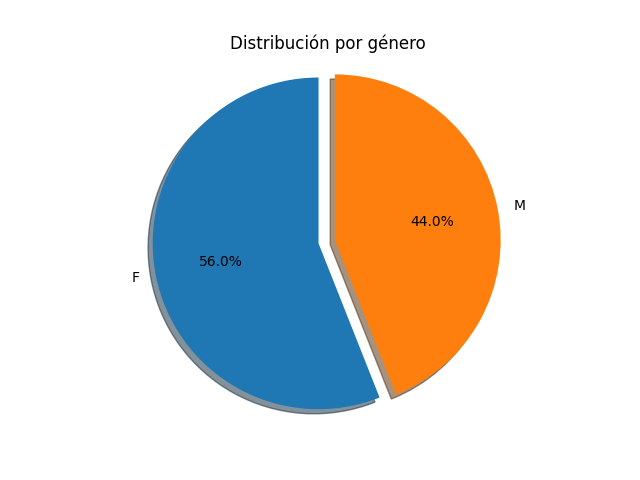

In [44]:
casos_M = df_col.filter(df_col['Sexo']=='M').count()
casos_F = df_col.filter(df_col['Sexo']=='F').count()
sizes = [casos_M, casos_F]
labels = 'F', 'M'
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=(0, 0.1), labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Distribución por género')
%matplot plt

## Evolucion de infectados en Colombia

## Contagios

In [45]:
df_glo_col = df_glo.filter(df_glo['Country Name'] == "Colombia").groupBy('day', 'Country Name', 'Cumulative Confirmed').count().orderBy('Cumulative Confirmed',ascending=True).toPandas()
df_glo_col = df_glo_col.iloc[0:70]
df_glo_col

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

          day Country Name  Cumulative Confirmed  count
0  2020-03-08     Colombia                     1      1
1  2020-03-09     Colombia                     1      1
2  2020-03-06     Colombia                     1      1
3  2020-03-07     Colombia                     1      1
4  2020-03-10     Colombia                     3      1
..        ...          ...                   ...    ...
65 2020-05-10     Colombia                 10051      1
66 2020-05-11     Colombia                 10495      1
67 2020-05-12     Colombia                 11063      1
68 2020-05-13     Colombia                 11613      1
69 2020-05-14     Colombia                 12272      1

[70 rows x 4 columns]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

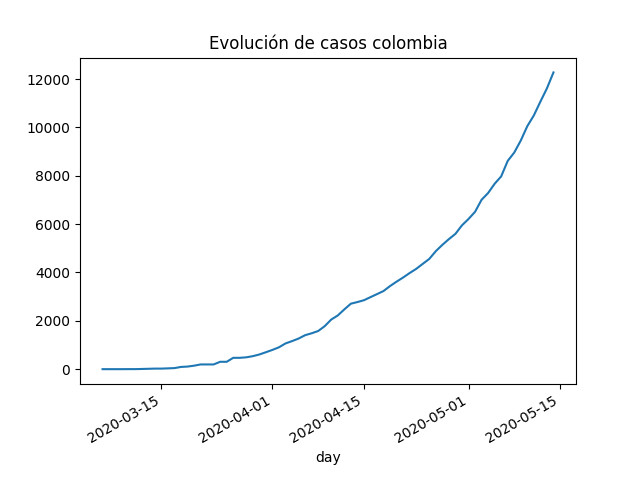

In [46]:
df_glo_col.plot(x='day', y='Cumulative Confirmed',legend=False, title="Evolución de casos colombia")
%matplot plt

## Muertes

In [47]:
df_glo_col_d = df_glo.filter(df_glo['Country Name'] == "Colombia").groupBy('day', 'Country Name', 'Cumulative Deaths').count().orderBy('Cumulative Deaths',ascending=True).toPandas()
df_glo_col_d = df_glo_col_d.iloc[0:70]
df_glo_col_d

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

          day Country Name  Cumulative Deaths  count
0  2020-03-13     Colombia                  0      1
1  2020-03-10     Colombia                  0      1
2  2020-03-19     Colombia                  0      1
3  2020-03-16     Colombia                  0      1
4  2020-03-14     Colombia                  0      1
..        ...          ...                ...    ...
65 2020-05-10     Colombia                428      1
66 2020-05-11     Colombia                445      1
67 2020-05-12     Colombia                463      1
68 2020-05-13     Colombia                479      1
69 2020-05-14     Colombia                493      1

[70 rows x 4 columns]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

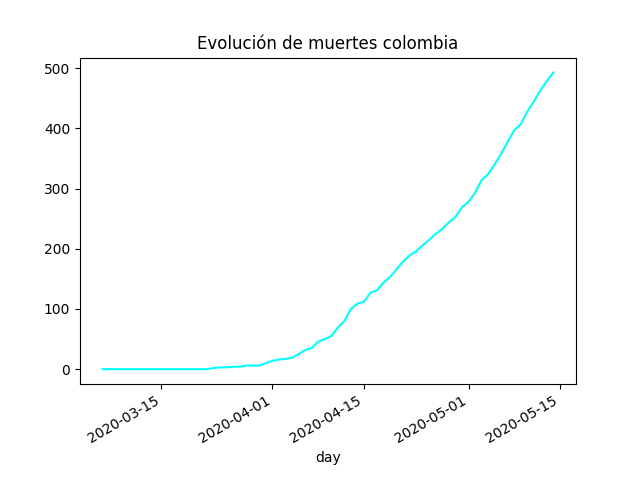

In [48]:
df_glo_col_d.plot(x='day', y='Cumulative Deaths',legend=False, color="cyan", title="Evolución de muertes colombia")
%matplot plt

# Comparación Colombia vs Mundo

## Contagios

In [49]:
df_glo_col = df_glo.filter(df_glo['Country Name'] == "Colombia").groupBy('day', 'Country Name', 'Cumulative Confirmed').count().orderBy('Cumulative Confirmed',ascending=True).toPandas()
df_glo_col = df_glo_col.iloc[0:70]
df_glo_eeuu = df_glo.filter(df_glo['Country Name'] == "United States of America").groupBy('day', 'Country Name', 'Cumulative Confirmed').count().orderBy('Cumulative Confirmed',ascending=True).toPandas()
df_glo_eeuu = df_glo_eeuu.iloc[0:120]
df_glo_spain = df_glo.filter(df_glo['Country Name'] == "Spain").groupBy('day', 'Country Name', 'Cumulative Confirmed').count().orderBy('Cumulative Confirmed',ascending=True).toPandas()
df_glo_spain = df_glo_spain.iloc[0:120]
df_glo_italy = df_glo.filter(df_glo['Country Name'] == "Italy").groupBy('day', 'Country Name', 'Cumulative Confirmed').count().orderBy('Cumulative Confirmed',ascending=True).toPandas()
df_glo_italy = df_glo_italy.iloc[0:120]
df_glo_uk = df_glo.filter(df_glo['Country Name'] == "The United Kingdom").groupBy('day', 'Country Name', 'Cumulative Confirmed').count().orderBy('Cumulative Confirmed',ascending=True).toPandas()
df_glo_uk = df_glo_uk.iloc[0:120]
dataframes = [df_glo_col, df_glo_eeuu, df_glo_eeuu, df_glo_spain, df_glo_italy, df_glo_uk]
df = pd.concat(dataframes, sort='False', ignore_index='True')
df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

           Country Name  Cumulative Confirmed  count        day
0              Colombia                     1      1 2020-03-06
1              Colombia                     1      1 2020-03-07
2              Colombia                     1      1 2020-03-08
3              Colombia                     1      1 2020-03-09
4              Colombia                     3      1 2020-03-10
..                  ...                   ...    ...        ...
624  The United Kingdom                223064      1 2020-05-12
625  The United Kingdom                226467      1 2020-05-13
626  The United Kingdom                229709      1 2020-05-14
627  The United Kingdom                233155      1 2020-05-15
628  The United Kingdom                236715      1 2020-05-16

[629 rows x 4 columns]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

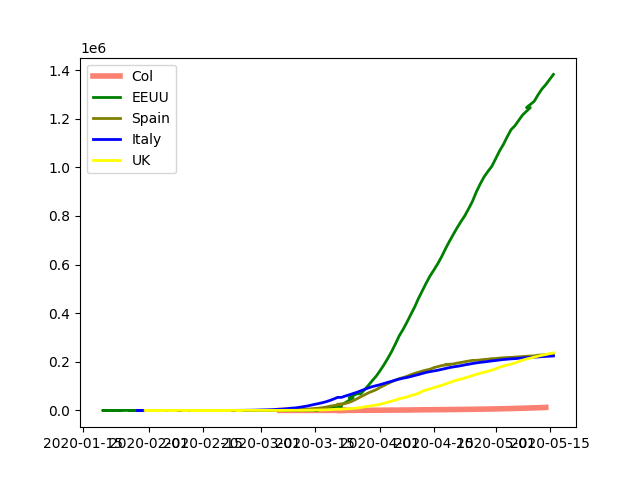

In [50]:
#df_glo_col.plot(x='day', y='Cumulative Confirmed',legend=True, title="Evolución de casos colombia vs Mundo")
plt.figure()
plt.clf()
plt.plot( 'day', 'Cumulative Confirmed', data=df_glo_col, marker='', color='salmon', linewidth=4, label="Col")
plt.plot( 'day', 'Cumulative Confirmed', data=df_glo_eeuu, marker='', color='green', linewidth=2, label="EEUU")
plt.plot( 'day', 'Cumulative Confirmed', data=df_glo_spain, marker='', color='olive', linewidth=2, label="Spain")
plt.plot( 'day', 'Cumulative Confirmed', data=df_glo_italy, marker='', color='blue', linewidth=2, label="Italy")
plt.plot( 'day', 'Cumulative Confirmed', data=df_glo_uk, marker='', color='yellow', linewidth=2, label="UK")
plt.legend()
%matplot plt

### Notar que las dimensiones de los contagios dado la gran expansión del coronavirus en EEUU se escala a millones 

Además vemos que en comparación con los demás paises Colombia mantiene una tasa de contagios menor

## Muertes

In [51]:
df_glo_cold = df_glo.filter(df_glo['Country Name'] == "Colombia").groupBy('day', 'Country Name', 'Cumulative Deaths').count().orderBy('Cumulative Deaths',ascending=True).toPandas()
df_glo_cold = df_glo_cold.iloc[0:70]
df_glo_eeuud = df_glo.filter(df_glo['Country Name'] == "United States of America").groupBy('day', 'Country Name', 'Cumulative Deaths').count().orderBy('Cumulative Deaths',ascending=True).toPandas()
df_glo_eeuud = df_glo_eeuud.iloc[0:120]
df_glo_spaind = df_glo.filter(df_glo['Country Name'] == "Spain").groupBy('day', 'Country Name', 'Cumulative Deaths').count().orderBy('Cumulative Deaths',ascending=True).toPandas()
df_glo_spaind = df_glo_spaind.iloc[0:120]
df_glo_italyd = df_glo.filter(df_glo['Country Name'] == "Italy").groupBy('day', 'Country Name', 'Cumulative Deaths').count().orderBy('Cumulative Deaths',ascending=True).toPandas()
df_glo_italyd = df_glo_italyd.iloc[0:120]
df_glo_ukd = df_glo.filter(df_glo['Country Name'] == "The United Kingdom").groupBy('day', 'Country Name', 'Cumulative Deaths').count().orderBy('Cumulative Deaths',ascending=True).toPandas()
df_glo_ukd = df_glo_ukd.iloc[0:120]
dataframes = [df_glo_cold, df_glo_eeuud, df_glo_eeuud, df_glo_spaind, df_glo_italyd, df_glo_ukd]
df = pd.concat(dataframes, sort='False', ignore_index='True')
df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

           Country Name  Cumulative Deaths  count        day
0              Colombia                  0      1 2020-03-08
1              Colombia                  0      1 2020-03-13
2              Colombia                  0      1 2020-03-22
3              Colombia                  0      1 2020-03-19
4              Colombia                  0      1 2020-03-12
..                  ...                ...    ...        ...
624  The United Kingdom              32065      1 2020-05-12
625  The United Kingdom              32692      1 2020-05-13
626  The United Kingdom              33186      1 2020-05-14
627  The United Kingdom              33614      1 2020-05-15
628  The United Kingdom              33998      1 2020-05-16

[629 rows x 4 columns]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

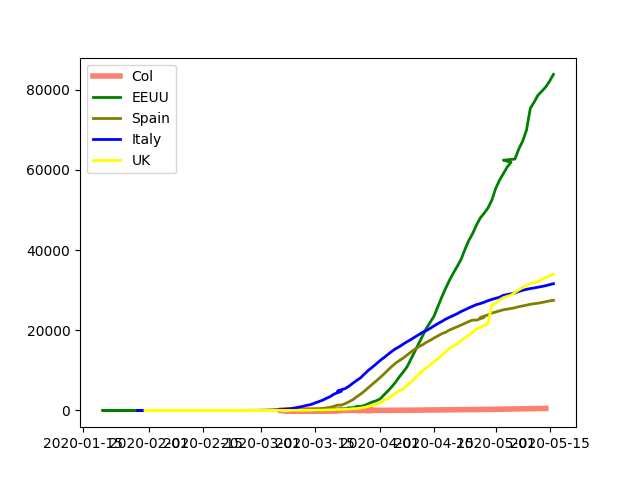

In [52]:
plt.figure()
plt.clf()
plt.plot( 'day', 'Cumulative Deaths', data=df_glo_cold, marker='', color='salmon', linewidth=4, label="Col")
plt.plot( 'day', 'Cumulative Deaths', data=df_glo_eeuud, marker='', color='green', linewidth=2, label="EEUU")
plt.plot( 'day', 'Cumulative Deaths', data=df_glo_spaind, marker='', color='olive', linewidth=2, label="Spain")
plt.plot( 'day', 'Cumulative Deaths', data=df_glo_italyd, marker='', color='blue', linewidth=2, label="Italy")
plt.plot( 'day', 'Cumulative Deaths', data=df_glo_ukd, marker='', color='yellow', linewidth=2, label="UK")
plt.legend()
%matplot plt

### Días con mayor número de contagios

In [53]:
df_glo_col_c = df_glo.filter(df_glo['Country Name'] == "Colombia").groupBy('day', 'Country Name', 'Confirmed').count().orderBy('Confirmed',ascending=True).toPandas()
df_glo_col_c = df_glo_col_c.iloc[0:70]
df_glo_col_c

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

          day Country Name  Confirmed  count
0  2020-03-08     Colombia          0      1
1  2020-03-22     Colombia          0      1
2  2020-03-11     Colombia          0      1
3  2020-03-27     Colombia          0      1
4  2020-03-25     Colombia          0      1
..        ...          ...        ...    ...
65 2020-05-13     Colombia        550      1
66 2020-05-12     Colombia        568      1
67 2020-05-10     Colombia        595      1
68 2020-05-07     Colombia        640      1
69 2020-05-15     Colombia        658      1

[70 rows x 4 columns]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

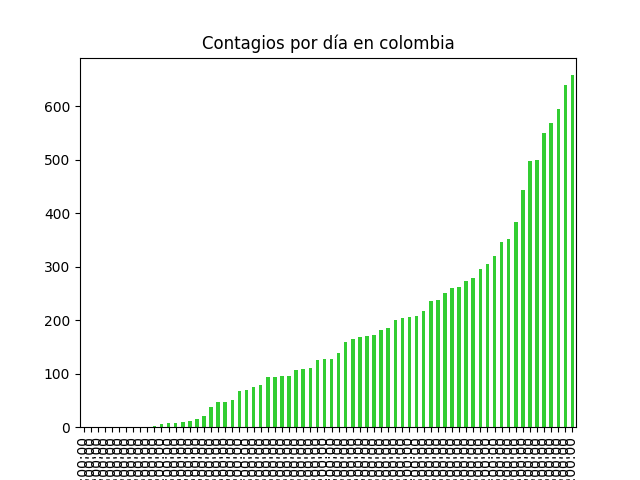

In [54]:
df_glo_col_c.plot(x='day', y='Confirmed',kind="bar", legend=False, color="limegreen", title="Contagios por día en colombia")
%matplot plt

Como se puede ver en la gráfica en Colombia aún no se alcanza un pico de contagios y en los últimos días la tasa de contagios sigue en aumento

In [55]:
df_glo_fra_c = df_glo.filter(df_glo['Country Name'] == "France").groupBy('day', 'Country Name', 'Confirmed').count().orderBy('Confirmed',ascending=True).toPandas()
df_glo_fra_c = df_glo_fra_c.iloc[10:250]
df_glo_fra_c

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

           day Country Name  Confirmed  count
10  2020-02-02       France          0      1
11  2020-02-20       France          0      1
12  2020-02-07       France          0      1
13  2020-01-31       France          0      1
14  2020-01-25       France          0      1
..         ...          ...        ...    ...
109 2020-03-29       France       4603      1
110 2020-04-02       France       4784      1
111 2020-04-04       France       5209      1
112 2020-04-15       France       5483      1
113 2020-04-01       France       7500      1

[104 rows x 4 columns]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

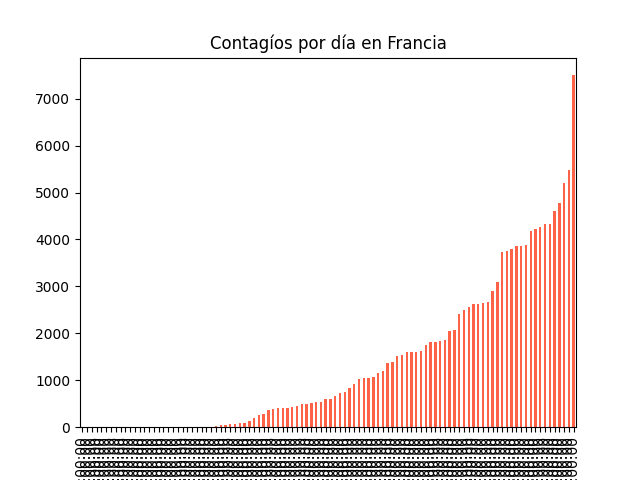

In [56]:
df_glo_fra_c.plot(x='day', y='Confirmed',kind="bar", legend=False, color="tomato", title="Contagíos por día en Francia")
%matplot plt

No obstante en comparación con Francia un país con número de población similar (60 millones vs 50 millones) la tasa de contagios por día ha sido significativamente más alta

# Test

In [57]:
df_test_p = df_test.groupBy('Entity', 'Total COVID-19 tests').count().orderBy('Total Covid-19 tests',ascending=False).toPandas()
df_test_p = df_test_p.iloc[0:25]
df_test_p

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                Entity  Total COVID-19 tests  count
0                    China - Guangdong                320000      1
1                          South Korea                316664      1
2                                Italy                206886      1
3                              Germany                167000      1
4                               Russia                143519      1
5                 United Arab Emirates                125000      1
6                            Australia                113615      1
7                        United States                103945      1
8                                 Iran                 80000      1
9                       United Kingdom                 64621      1
10               Canada - National lab                 54956      1
11                              Norway                 43735      1
12         Australia - New South Wales                 39089      1
13  United States - CDC samples tested          

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

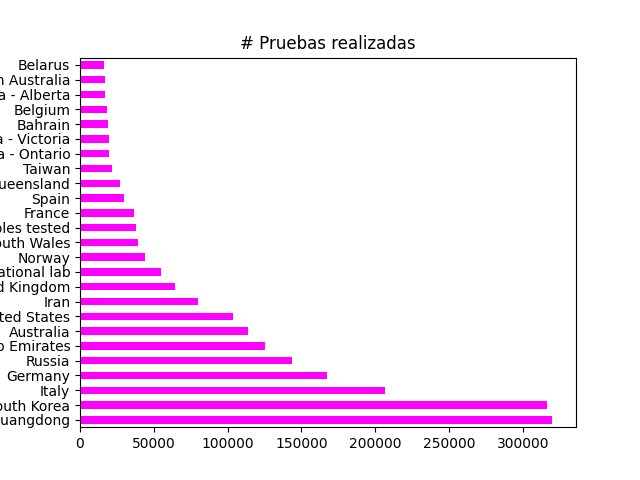

In [58]:
df_test_p.plot(x='Entity', y='Total COVID-19 tests',kind="barh", legend=False, color="magenta", title="# Pruebas realizadas")
%matplot plt